# Insurance Claims- Fraud Detection

- Problem Statement:

#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [73]:
df = pd.read_csv(r"E:\Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [3]:
#Dropping Column '_c39' as it contains '1000' null values.

df = df.drop(columns=['_c39'],axis=1)

In [9]:
df.shape

(1000, 39)

In [10]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
#As we can see there is no null values in our data set.
#Let's move on to check uniqueness and value counts of every column

In [14]:
# Checking uniqueness

for i in df.columns:
    print (i,':',len(df[i].unique()))    

months_as_customer : 391
age : 46
policy_number : 1000
policy_bind_date : 951
policy_state : 3
policy_csl : 3
policy_deductable : 3
policy_annual_premium : 991
umbrella_limit : 11
insured_zip : 995
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
capital-gains : 338
capital-loss : 354
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
incident_hour_of_the_day : 24
number_of_vehicles_involved : 4
property_damage : 3
bodily_injuries : 3
witnesses : 4
police_report_available : 3
total_claim_amount : 763
injury_claim : 638
property_claim : 626
vehicle_claim : 726
auto_make : 14
auto_model : 39
auto_year : 21
fraud_reported : 2


In [15]:
#Checking for Value counts for Categorical data:

for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('*'*70)

05-08-1992    3
01-01-2006    3
28-04-1992    3
20-07-1991    2
27-07-2014    2
             ..
10-07-2012    1
10-02-1994    1
02-04-2002    1
28-07-2002    1
08-03-1998    1
Name: policy_bind_date, Length: 951, dtype: int64
**********************************************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
**********************************************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
**********************************************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
**********************************************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
**********************************************************************
machine-op-inspct    93
prof-specialty  

In [24]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Data Visualisation

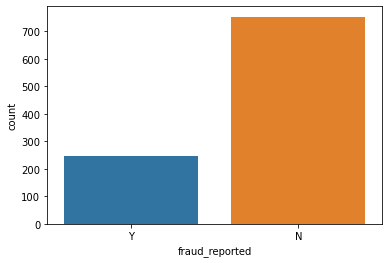

In [23]:
#Let's Plot count plot
sns.countplot(x='fraud_reported',data=df)
plt.show()

- Count of 'No' Fraud reported is more which means it is imbalanced and we need to treat it.
- We should neglect as many as false positives as we can.

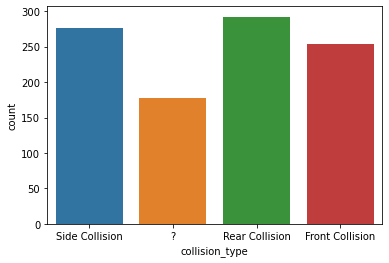

In [29]:
sns.countplot(x='collision_type',data=df)
plt.show()

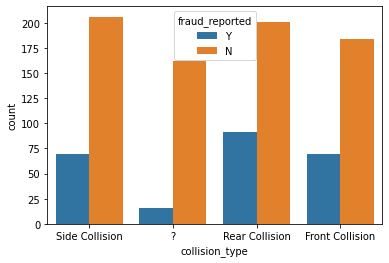

In [30]:
sns.countplot(x='collision_type',hue='fraud_reported',data=df)
plt.show()

- Fraud Reported count 'YES'of rear collision is more.
- Fraud Reported count 'NO' of side collision is more.
- '?' should be refer as unkown.

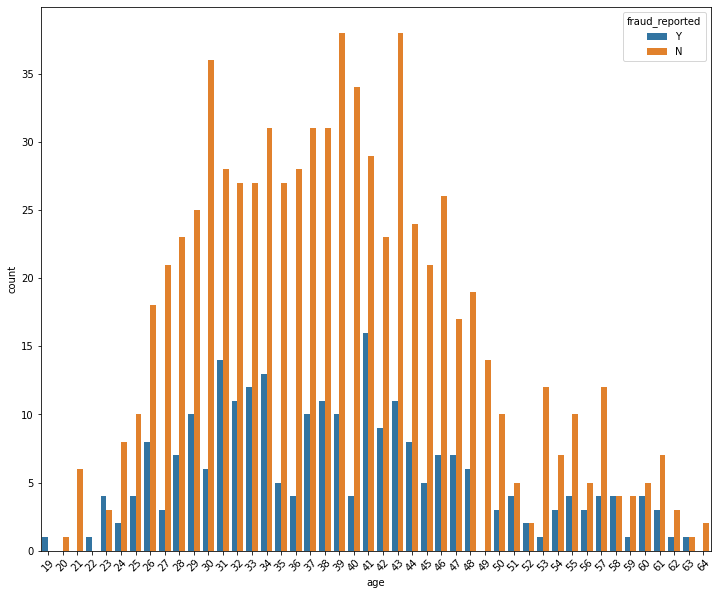

In [36]:
plt.figure(figsize=(12,10))
sns.countplot(x='age',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

- There is large number of fraud reported between age group 20 to 60

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

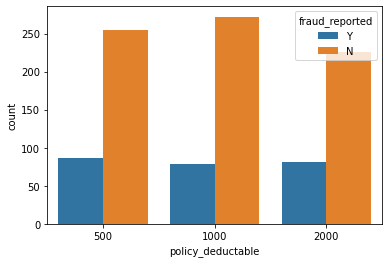

In [40]:

sns.countplot(x='policy_deductable',hue='fraud_reported',data=df)


- Count of policy deductable 1000 is more.

<AxesSubplot:xlabel='property_damage', ylabel='count'>

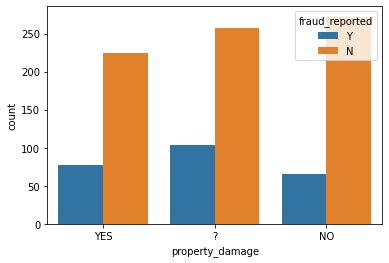

In [42]:
sns.countplot(x='property_damage',hue='fraud_reported',data=df)

- Most number of cases show 'NO' property damage.
- '?' will treat as 'NO' property damage.

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

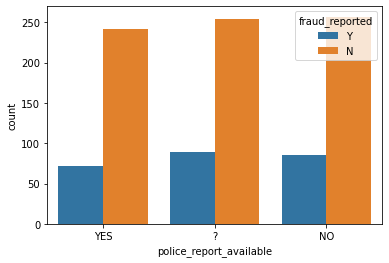

In [44]:
sns.countplot(x='police_report_available',hue='fraud_reported',data=df)

- Above plot shows same number of occurence for each category
- '?' will treat as 'No' police report available

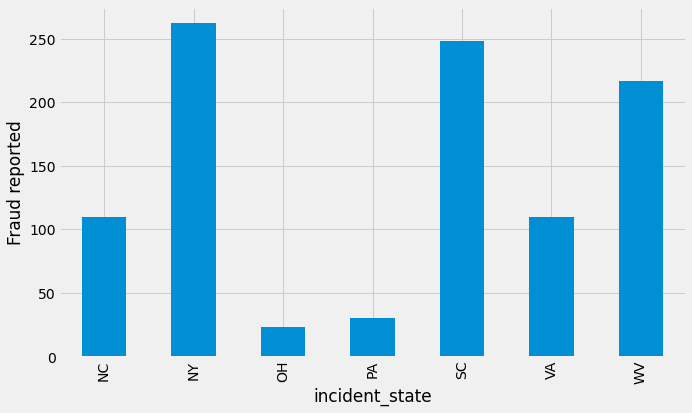

In [46]:
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

- For states 'NY' and 'SC' for reported are more.

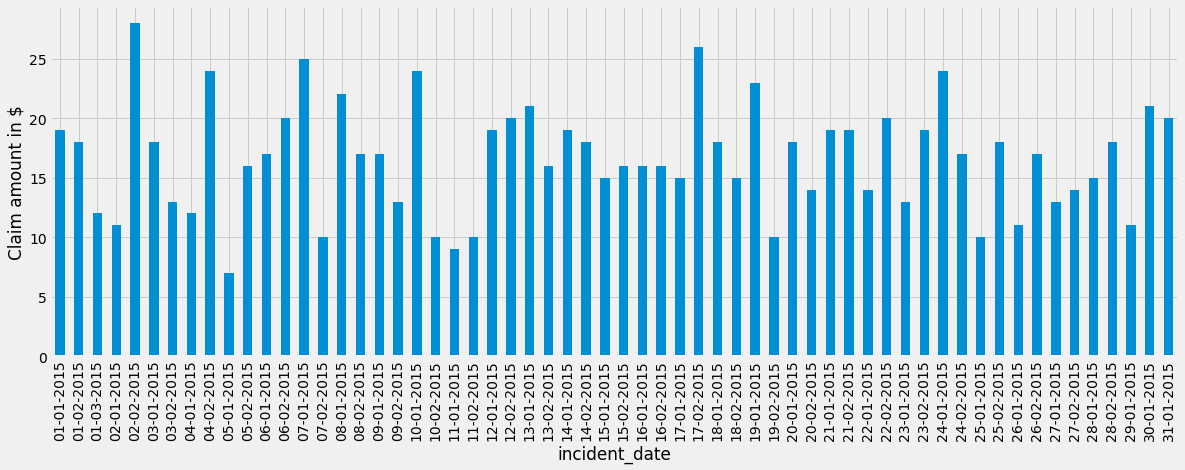

In [47]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount in $')
plt.show()

- All the dates are from month of January and February.

<AxesSubplot:xlabel='policy_state', ylabel='count'>

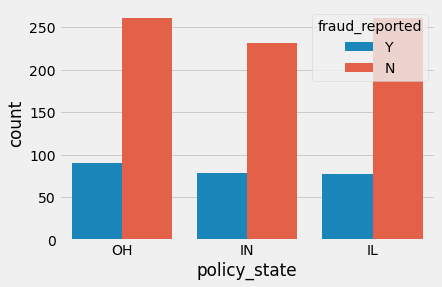

In [50]:
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

- 'OH' is most policy state count and fraud reported.

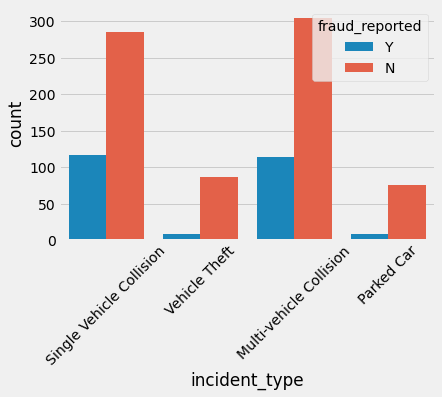

In [60]:
sns.countplot(x='incident_type',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

- Multi vehicle collision has more in no. of fraud reports.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

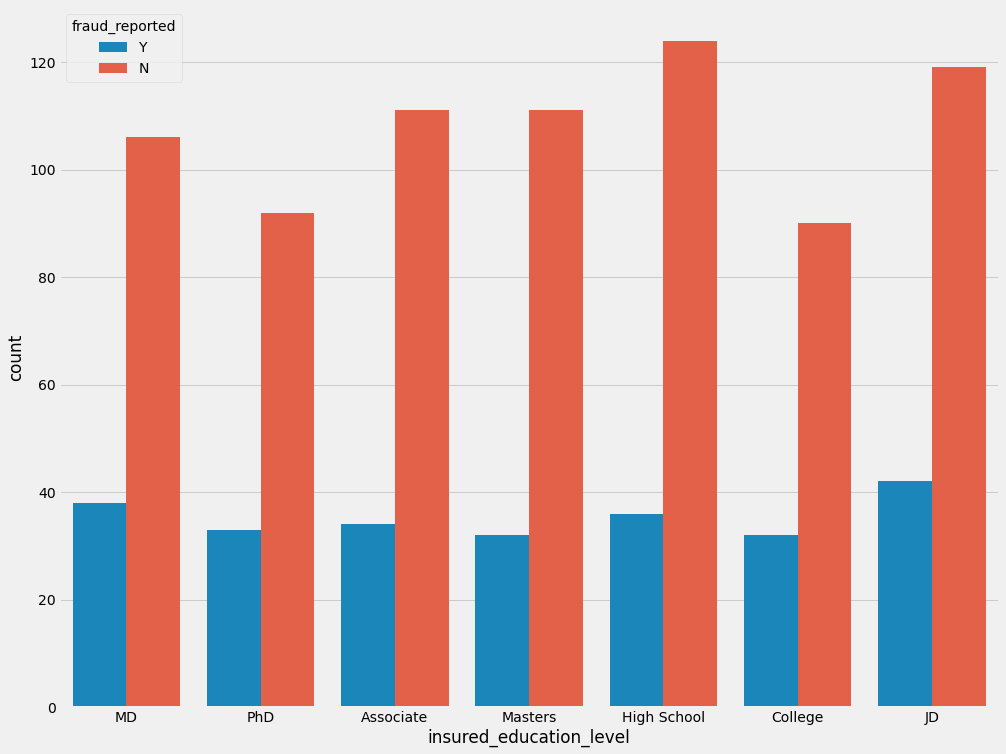

In [56]:
plt.figure(figsize=(15,12))
sns.countplot(x='insured_education_level',data=df,hue='fraud_reported')

- Fraud reported for insured education level 'High School' is more.

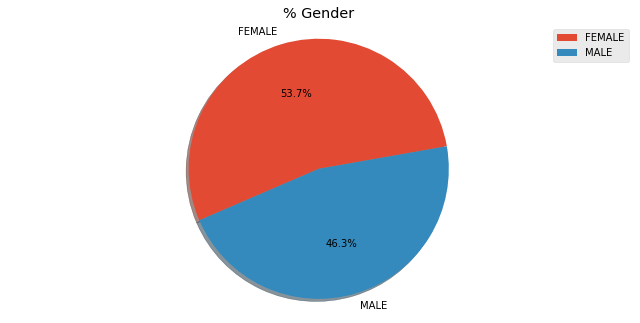

In [63]:
# Marital status

plt.style.use('ggplot')
gender = df['insured_sex'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(gender.values, labels = gender.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.title('% Gender ')
plt.legend()
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.show()

- Female gender are more in numbers.

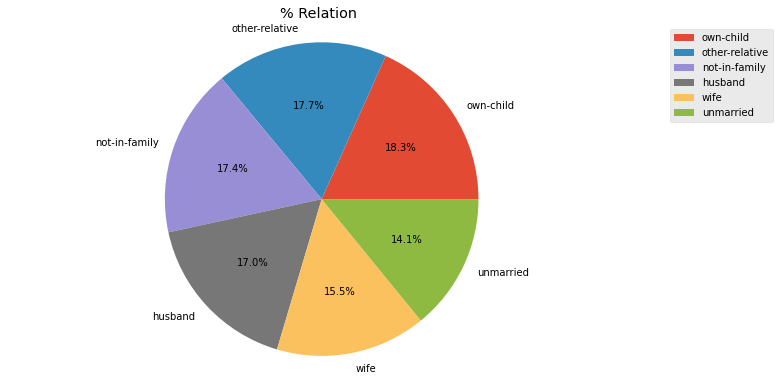

In [64]:
plt.figure(figsize=(10, 6))
plt.pie( df["insured_relationship"].value_counts().values, labels = df["insured_relationship"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('% Relation ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

- All relation are distributed equally.

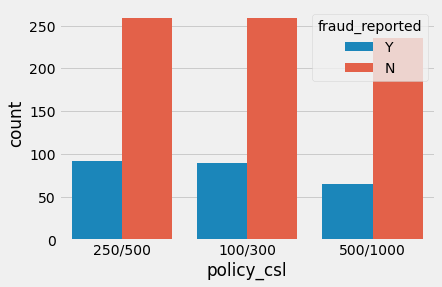

In [61]:
sns.countplot(x = 'policy_csl', hue = 'fraud_reported', data = df)
plt.show()

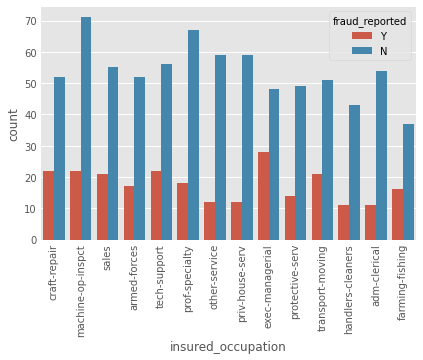

In [65]:
sns.countplot(x = 'insured_occupation', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 90)
plt.show()

- Ratio of fraud to not a fraud is higher in case of exec-managarial occupation.

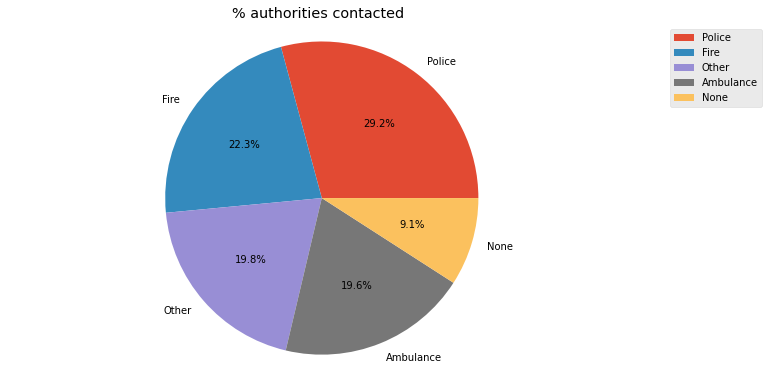

In [67]:
plt.figure(figsize=(10, 6))
plt.pie( df["authorities_contacted"].value_counts().values, labels = df["authorities_contacted"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('% authorities contacted ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

- When fraud reported to police stations are more in number.

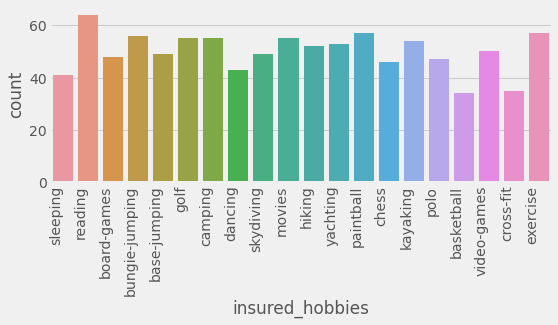

In [73]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

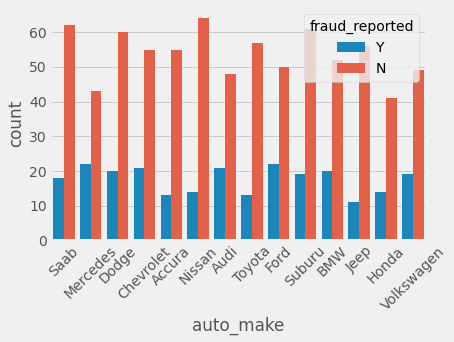

In [81]:
sns.countplot(x='auto_make',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

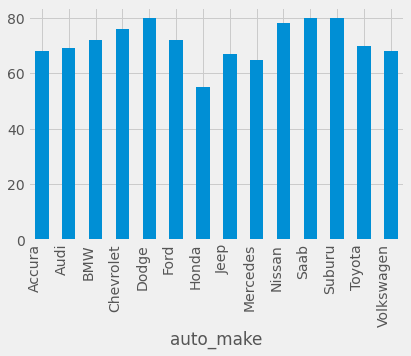

In [74]:
ax = df.groupby('auto_make').vehicle_claim.count().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

- Honda vehicles are gone through very less claim counts.

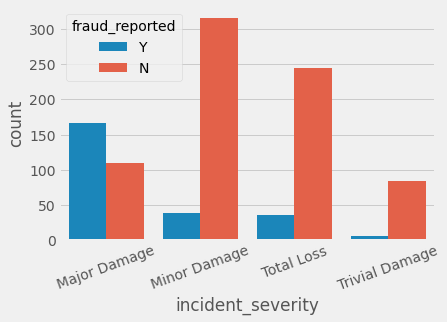

In [76]:
#lets check fraud_report based on incident_severity
sns.countplot(x = 'incident_severity', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 20)
plt.show()

- Major Damage Severity fraud reported are more as compared with others.

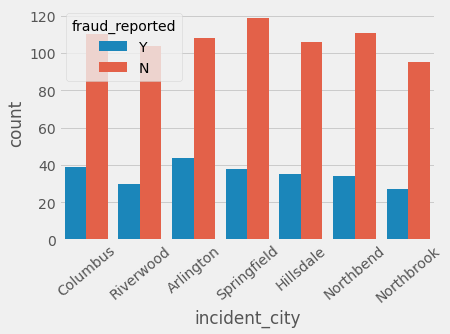

In [77]:
#lets check the counts for incident_state column
sns.countplot(x = 'incident_city',hue='fraud_reported',data = df)
plt.xticks(rotation = 40)
plt.show()

- Ratio of fraud reported in Arlington city is more.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

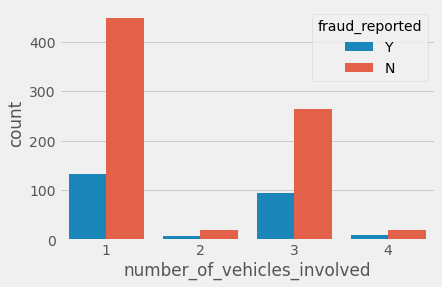

In [82]:
sns.countplot(x = 'number_of_vehicles_involved', hue = 'fraud_reported', data = df)

- In most of the cases number of vehicles involved is 1 or 3, in this case the ratio of getting fraud is less when it is compared with number of vehicles involved is 4.

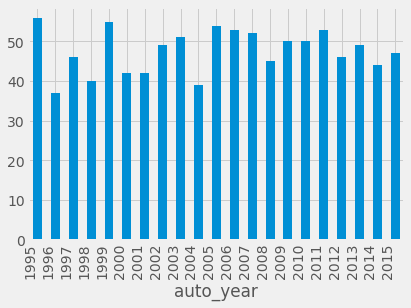

In [83]:
#lets plot countplot for auto_year column:

ax = df.groupby('auto_year').vehicle_claim.count().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

- There is less no. of vehicles between 1996 and 2004.
- Auto year ranges between 1995 to 2015.

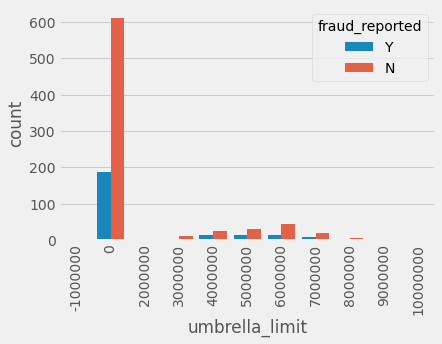

In [88]:
sns.countplot(x = 'umbrella_limit', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 90)
plt.show()

- An umbrella insurance policy is extra liability insurance coverage given to customers. Here we can see it is mostly 0.

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

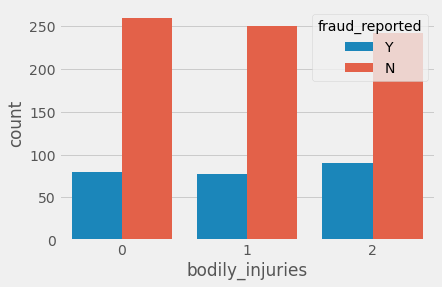

In [84]:
#Bodily Injuries.

sns.countplot(x='bodily_injuries',hue='fraud_reported',data=df)

##### DATA PREPROCESSING

In [4]:
#lets replace the categorical data in columns property_damage and police_report_available with suitable number
# replacing '?' with most frequent number of that column
df['property_damage'].replace('YES', 1, inplace=True)
df['property_damage'].replace('NO', 0, inplace=True)
df['property_damage'].replace('?', 0, inplace=True)
df['police_report_available'].replace('YES', 1, inplace=True)
df['police_report_available'].replace('NO',0, inplace=True)
df['police_report_available'].replace('?', 0, inplace=True)
df.head()



,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
#Dropping Unwanted columns :

df = df.drop(columns=['policy_bind_date','policy_number','policy_csl'
                      ,'incident_date','insured_zip'],axis=1)

In [6]:
#Adding column Vehicle Age :

df['vehicle_age'] = 2018-df['auto_year']

In [7]:
df=df.drop(columns=['auto_year'],axis=1)

<AxesSubplot:>

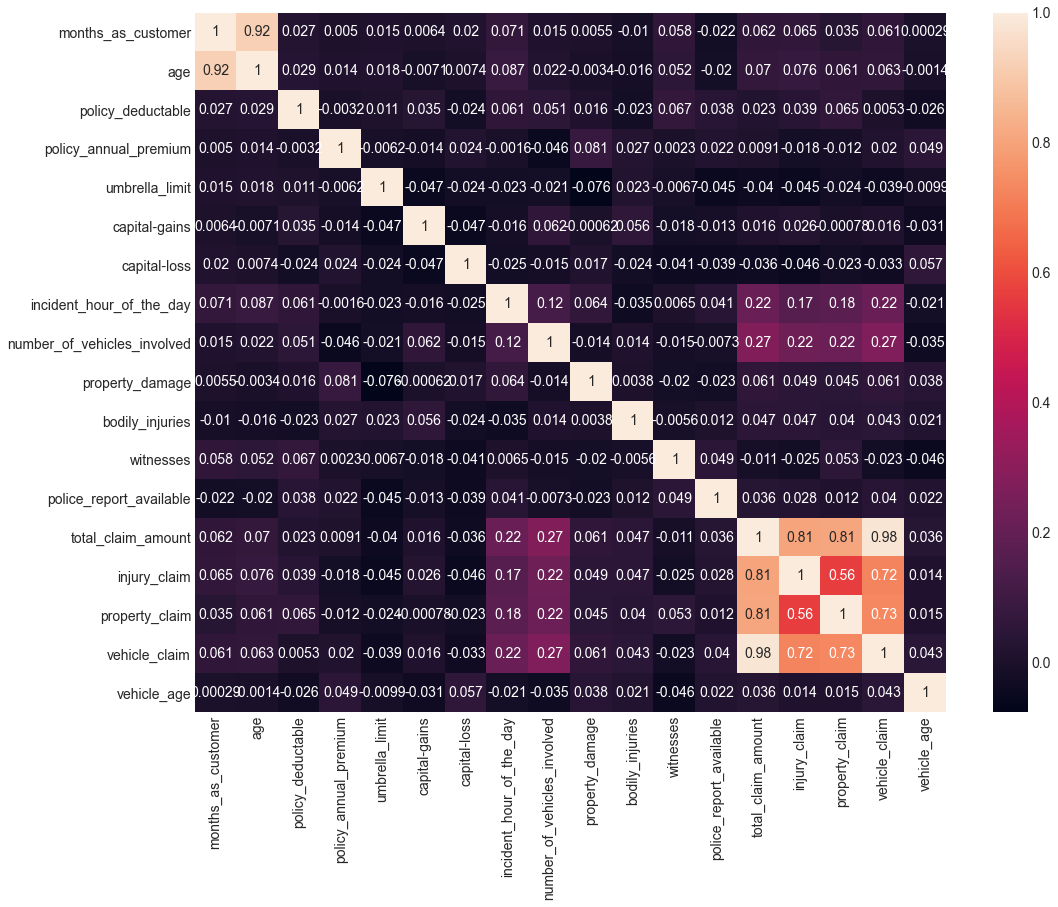

In [104]:
#Heatmap and correlation :

sns.set_style("darkgrid")
plt.figure(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr, annot=True)

- Injury claim,Property claim and Vehicle Claim is having high correlation with total claim.

In [105]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries                  int64
witnesses                        int64
police_report_available  

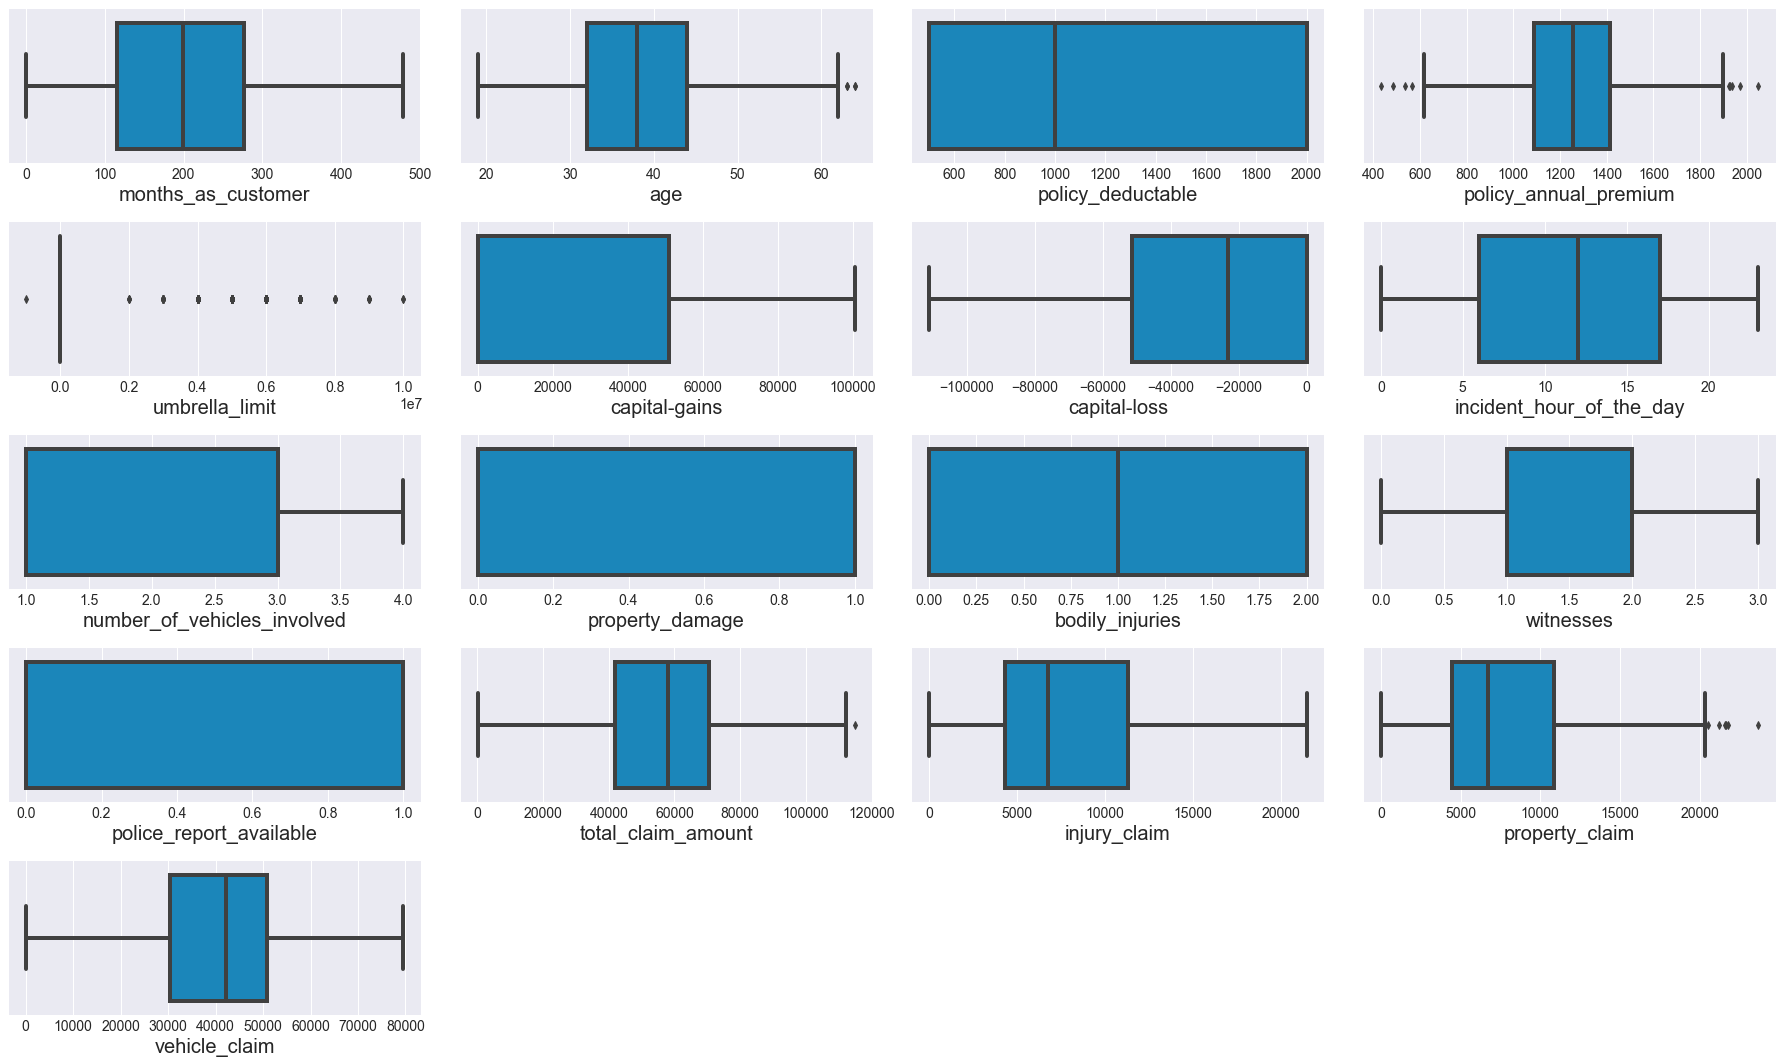

In [107]:
#Checking outliers using box plot

num = df._get_numeric_data()
plt.figure(figsize = (25,15))
plotnumber = 1
for column in num:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

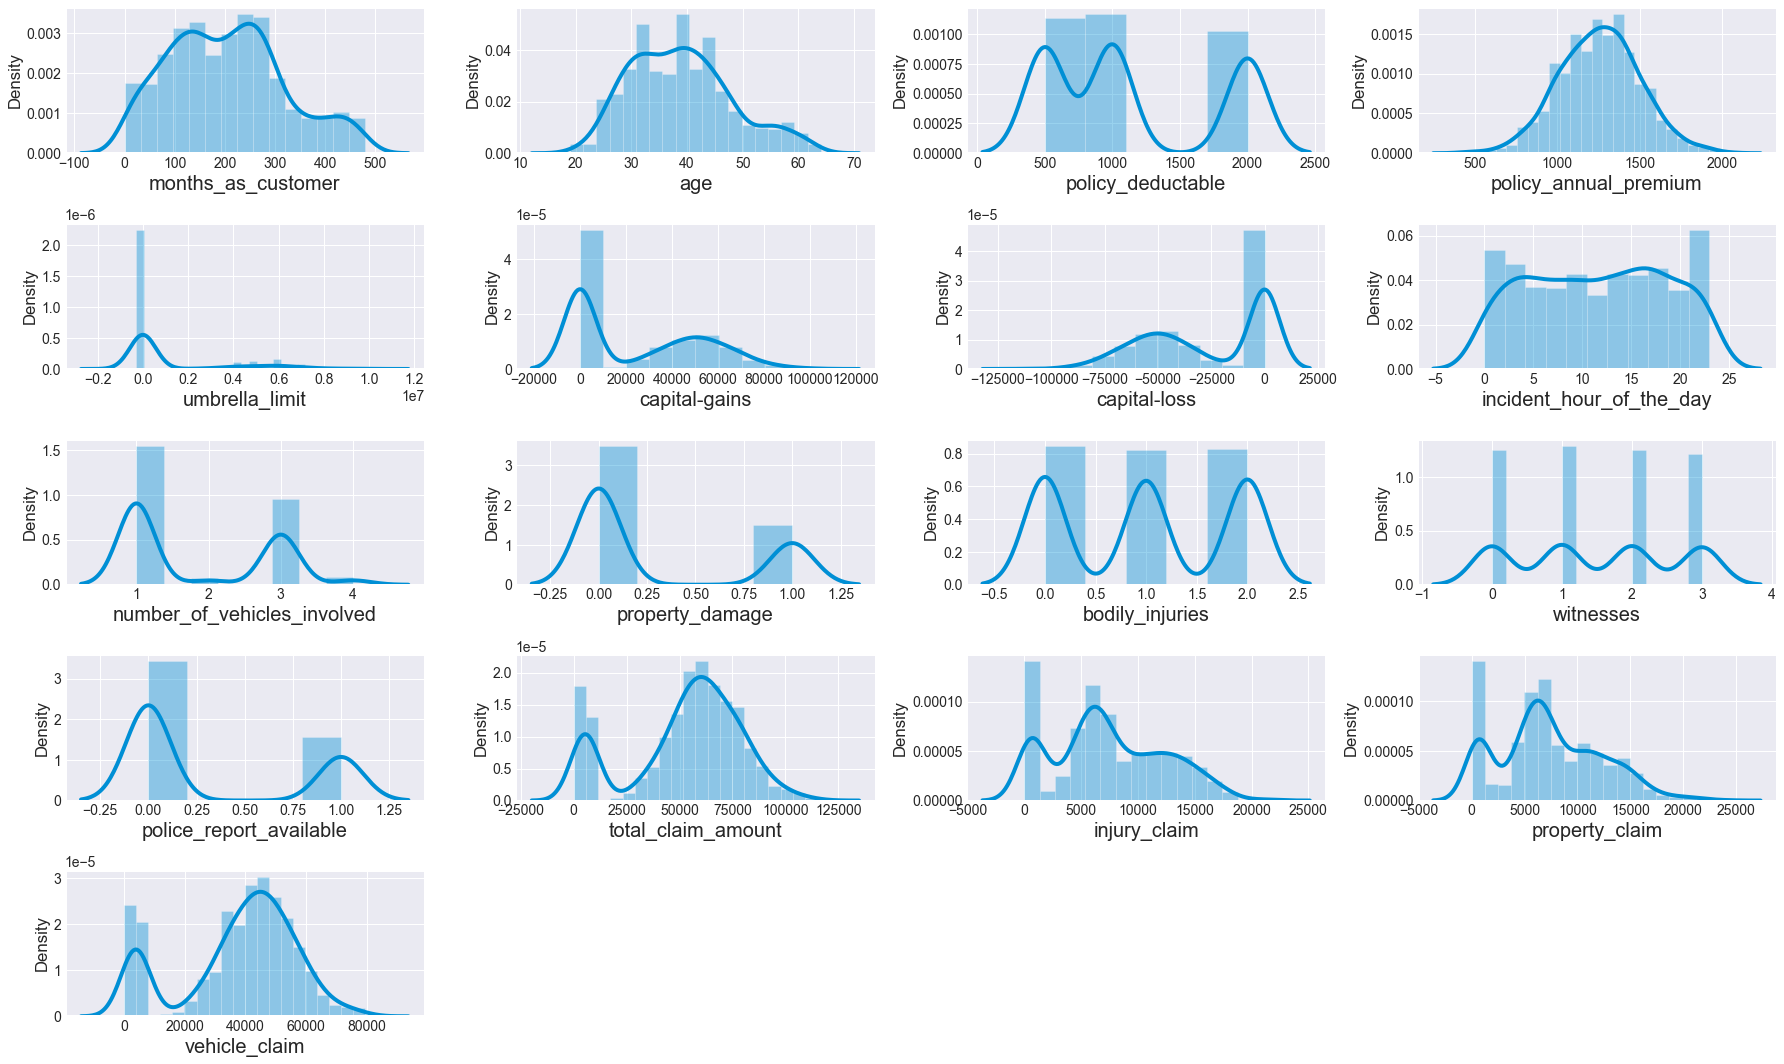

In [108]:
# Checking Data Distribution :

num = df._get_numeric_data()
plt.figure(figsize = (25,15))
plotnumber = 1
for column in num:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(num[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

- There is skewness present in some data columns.

In [8]:
#Removing ouliers :

from scipy import stats
z=np.abs(stats.zscore(df._get_numeric_data()))
print(z)
print('row no. : ',np.where(z>3)[0])

[[1.07813958 0.99083647 0.22238259 ... 1.16550497 0.74965272 0.1834404 ]
 [0.2089946  0.33407345 1.41278352 ... 1.37269599 1.82334593 0.31549088]
 [0.60800168 1.08891308 1.41278352 ... 0.73607206 0.78556451 0.31549088]
 ...
 [0.64276748 0.54161057 1.03996564 ... 0.0208261  0.77190224 1.5139238 ]
 [2.20802805 2.52328351 1.41278352 ... 0.45197603 0.07357971 1.18130295]
 [2.19064515 2.3043625  0.22238259 ... 1.34366428 1.81434017 0.31549088]]
row no. :  [ 31  48  88 115 119 229 248 262 314 430 458 500 503 657 700 763 807 875
 922 975]


In [9]:
index = (np.where(z>3)[0])
df1=df.drop(df.index[index])
df1.shape
#Checking Shape after cleaning outliers

(980, 34)

In [10]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
vehicle_age                    0.048289
dtype: float64

##### Seperating Features and Labels

In [11]:
# replacing label data with 0 & 1
df1['fraud_reported'].replace('Y', 1, inplace = True)
df1['fraud_reported'].replace('N', 0, inplace = True)

In [12]:
x=df1.drop(columns=['fraud_reported'],axis=1)
y=df1['fraud_reported']

In [13]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

In [14]:
for index in num.skew().index:
    if num.skew().loc[index]>0.5:
        num[index]=np.cbrt(num[index])
    if num.skew().loc[index]<-0.5:
        num[index]=np.log1p(num[index])

In [15]:
num.skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.603923
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.431291
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -1.666245
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -1.675388
vehicle_age                    0.054522
dtype: float64

In [16]:
#Bring all numerical features to common scale by applying standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_numeric = scaler.fit_transform(num)
x_numeric = pd.DataFrame(x_numeric,columns=num.columns)

In [17]:
#combining both numerical and categorical features
X = pd.concat([num,cat], axis = 1)

# Encoding using Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = le.fit_transform(X[i].values.reshape(-1,1))

In [19]:
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,...,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,auto_make,auto_model
0,328,48,1000,1406.91,0.000000,53300,0,5,1.00000,1.0,...,0,2,3,0,4,4,1,976,10,1
1,228,42,2000,1197.22,170.997595,0,0,8,1.00000,0.0,...,2,3,0,1,4,5,5,615,8,12
2,134,29,2000,1413.14,170.997595,35100,0,7,1.44225,0.0,...,3,0,2,1,4,1,1,670,4,30
3,256,41,2000,1415.74,181.712059,48900,-62400,5,1.00000,0.0,...,4,2,1,0,4,2,0,655,3,34
4,228,44,1000,1583.91,181.712059,66000,-46000,20,1.00000,0.0,...,4,3,0,1,2,1,0,213,0,31


# Model Instantiation and Training

In [20]:
#Importing Models and other libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

##### Oversampling Using Smote

In [47]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [48]:
y_over.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

##### Finding Best Random State

In [49]:

max_accu = 0
max_rs = 0
for i in range(50,500):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.6027027027027027 on Random State 204


In [50]:
#Splitting Data into Train and Test :

x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = 204)

# Logistic Regression

In [51]:
rslt=[] #Making Empty List to store Results

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.5567567567567567
TESTING SCORE :  0.6027027027027027
ACCURACY : 0.6027027027027027
*****************************
[[114  68]
 [ 79 109]]
*****************************
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       182
           1       0.62      0.58      0.60       188

    accuracy                           0.60       370
   macro avg       0.60      0.60      0.60       370
weighted avg       0.60      0.60      0.60       370



# Random Forest Classifier

In [52]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.8513513513513513
ACCURACY : 0.8513513513513513
*****************************
[[154  28]
 [ 27 161]]
*****************************
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       182
           1       0.85      0.86      0.85       188

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370



# Decision Tree Classifier

In [53]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.8243243243243243
ACCURACY : 0.8243243243243243
*****************************
[[146  36]
 [ 29 159]]
*****************************
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       182
           1       0.82      0.85      0.83       188

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.82      0.82      0.82       370



# Gradient Boosting Classifier

In [54]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb.score(x_train,y_train))
print('TESTING SCORE : ', gb.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.9747747747747748
TESTING SCORE :  0.8675675675675676
ACCURACY : 0.8675675675675676
*****************************
[[157  25]
 [ 24 164]]
*****************************
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       182
           1       0.87      0.87      0.87       188

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370



# K Neighbours Classifier

In [55]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.7900900900900901
TESTING SCORE :  0.7081081081081081
ACCURACY : 0.7081081081081081
*****************************
[[104  78]
 [ 30 158]]
*****************************
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       182
           1       0.67      0.84      0.75       188

    accuracy                           0.71       370
   macro avg       0.72      0.71      0.70       370
weighted avg       0.72      0.71      0.70       370



# SVC

In [56]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', svc.score(x_train,y_train))
print('TESTING SCORE : ', svc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.5594594594594594
TESTING SCORE :  0.6054054054054054
ACCURACY : 0.6054054054054054
*****************************
[[100  82]
 [ 64 124]]
*****************************
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       182
           1       0.60      0.66      0.63       188

    accuracy                           0.61       370
   macro avg       0.61      0.60      0.60       370
weighted avg       0.61      0.61      0.60       370



In [57]:
#Creating DataFrame and storing all models result

result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree","Gradient Boosting","KNN","SVC"],"Score":rslt})
result_df

,ML Models,Score
0,Logistic Regression,0.602703
1,Random Forest,0.851351
2,Decision Tree,0.824324
3,Gradient Boosting,0.867568
4,KNN,0.708108
5,SVC,0.605405


In [58]:
#CROSS VALIDATION SCORE

mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Random Forest','Decision Tree','Gradientboost','KNN','SVC']
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),DecisionTreeClassifier(),
        GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=9),SVC()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,x_train,y_train,scoring = "accuracy",cv=3)
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(max_iter=1000)
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
KNeighborsClassifier(n_neighbors=9)
SVC()


,CV Mean,Std
Logistic Regression,0.580180,0.007750
Random Forest,0.868468,0.013483
Decision Tree,0.821622,0.017235
Gradientboost,0.890090,0.015964
KNN,0.629730,0.002207
SVC,0.541441,0.023180


##### ROC AUC SCORE

In [32]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [59]:
print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(x_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test,gb.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(x_test)))
print('ROC_AUC_SCORE_SVC :',roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.6030804302080898
ROC_AUC_SCORE_RANDOM_FOREST : 0.8512684124386252
ROC_AUC_SCORE_DECISION_TREE : 0.823971241524433
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.8674888940846388
ROC_AUC_SCORE_KNN : 0.7059270516717324
ROC_AUC_SCORE_SVC : 0.6045125087678279


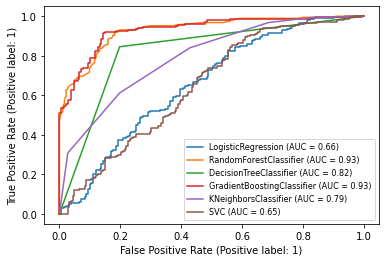

In [68]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

##### As per ROC AUC curve score Random Forest and Gradient Boosting Classifier are best fit models.So, we will do Hyperparameter tuning in any one of them.¶

### Applying Hyperparameter tuning in Gradient Boosting Classifier

In [66]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

pprint(gb.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [67]:
params = {'learning_rate':(0.1,0.2,0.3),
         'max_depth':(1,2,3),
         'n_estimators': (100,200,300,400),
         }
grid = GridSearchCV(GradientBoostingClassifier()
                    ,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': (0.1, 0.2, 0.3),
                         'max_depth': (1, 2, 3),
                         'n_estimators': (100, 200, 300, 400)})

In [69]:
best_param = grid.best_params_
best_param

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 400}

In [70]:
gb_tuned=GradientBoostingClassifier(n_estimators=400,max_depth=3,learning_rate=0.3)
gb_tuned.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=400)

In [71]:
y_pred_gb = gb_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred_gb)

print('TRAINING SCORE : ', gb_tuned.score(x_train,y_train))
print('TESTING SCORE : ', gb_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred_gb))
print('*****************************')
print(classification_report(y_test,y_pred_gb))

TRAINING SCORE :  1.0
TESTING SCORE :  0.8513513513513513
ACCURACY : 0.8513513513513513
*****************************
[[159  23]
 [ 32 156]]
*****************************
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       182
           1       0.87      0.83      0.85       188

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370



 1 = YES 
 0 = NO 


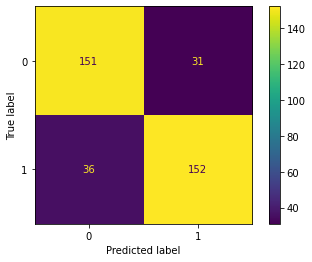

In [64]:
plot_confusion_matrix(rfc_tuned,x_test,y_test)

print(" 1 = YES ")
print(" 0 = NO ")

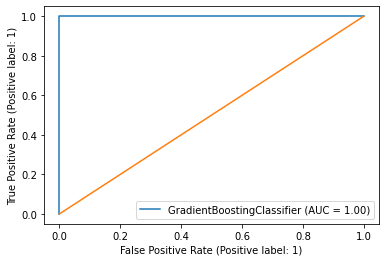

ROC_AUC_SCORE_GRADIENT_BOOSTING_Tuned : 0.8517068038344634


In [72]:
plot_roc_curve(gb_tuned,x_train,y_train)
plt.plot(y_test,y_test)
plt.show()
print('ROC_AUC_SCORE_GRADIENT_BOOSTING_Tuned :',roc_auc_score(y_test,gb_tuned.predict(x_test)))

# Efficiency Achieved and Conclusion :

- With the help og hyperparameter tuning we are able to increase training score by 2.5 %
- Improved ROC_AUC curve shows better performance by our model.
- Hence, gb_tuned is our Best Fit Model.